In [1]:
import sys
sys.path.append('/mnt/c/Users/luukv/Documenten/NatuurSterrkenkundeMasterProject/CodeMP/MasterProject')
from functions import *
from import_data import *

from astropy.constants import R_sun, L_sun, sigma_sb
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

<font color='yellow'>Import stellar parameters</font>

In [2]:
df_MRL = pd.read_csv("../tables/results/MassRadiusLuminosity.csv")

In [3]:
df_MRL

,id,M_HRD,M_opt,M_opt_err,M_exp,M_exp_err,M_opt/M_exp,R_true,R_true_err,R_expected,...,logL_true/L_sun,logL_true/L_sun_err_high,logL_true/L_sun_err_low,Teff,Teff_err,logTeff,logTeff_err,M_opt/M_exp_err,R_expected/R_true_err_high,R_expected/R_true_err_low
0,SMC X-1,33,18.0,2.0,31.2,2.0,0.576923,15.0,1.0,20.894403,...,5.477454,0.042485,0.070008,29558.0,1446,4.470675,0.021246,0.117104,0.143489,0.157140
1,Vela X-1,36,26.0,1.0,35.4,2.6,0.734463,29.0,1.0,25.559961,...,5.598494,0.050087,0.052022,28653.0,1446,4.457170,0.021917,0.066251,0.120151,0.121236
2,LMC X-4,21,18.0,1.0,20.4,1.5,0.882353,7.4,0.4,8.274571,...,4.873638,0.083173,0.083173,33179.0,1446,4.520863,0.018927,0.085415,0.142899,0.142899
3,4U1700-37,45,46.0,5.0,44.0,4.0,1.045455,22.0,2.0,17.419587,...,5.700208,0.061869,0.052136,36801.0,1446,4.565860,0.017064,0.144387,0.128182,0.122310
4,4U1538-52,19,16.0,2.0,19.8,1.0,0.808081,13.0,1.0,10.858886,...,4.908964,0.069792,0.081677,29558.0,1446,4.470675,0.021246,0.131494,0.141978,0.150146
5,Cen X-3,48,24.0,1.0,46.4,5.3,0.517241,11.4,0.7,19.771949,...,5.766928,0.097102,0.072357,35895.0,1446,4.555034,0.017495,0.072296,0.174157,0.157393
6,XTE J1855-026,23,21.0,2.0,21.6,1.8,0.972222,22.0,2.0,13.420960,...,5.092961,0.105505,0.101782,29558.0,1446,4.470675,0.021246,0.125037,0.165538,0.162419


<font color='yellow'> Lines of constant radius in HRD <font>

In [4]:
def L(Teff, R):
    # Some constants
    sigma = 5.67e-8 # W m-2 k-4
    Rsun = 696340000 # m
    Lsun = 3.86e26 # W

    return np.log10((4 * np.pi * sigma * Rsun**2) / Lsun) + 2 * np.log10(R) + 4 * np.log10(Teff)

radii = [0.01, 1, 100] # Solar radii
T_cR = [10**3, 10**5]
log_T_cR = [3, 5]
L_cR = []

for R in radii:
    save = []
    for T in T_cR:
        save.append(L(T, R))
    L_cR.append(save)

<font color='red' size=5> SET THE METALLICITY </font>

In [5]:
# Set the metallicity value
ZY_values = [(0.02, 0.284), (0.03, 0.302), (0.04, 0.321)]
Z = ZY_values[0][0]
Y = ZY_values[0][1]

<font color='yellow'> Calculate the location of the Zero Age Main-Sequence in the HRD </font>

In [6]:
L_ZAMS, T_ZAMS = ZAMS(Z=Z, Y=Y)

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/ext

<font color='yellow' size=5> Plot some evolutionary tracks</font>

Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |../evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


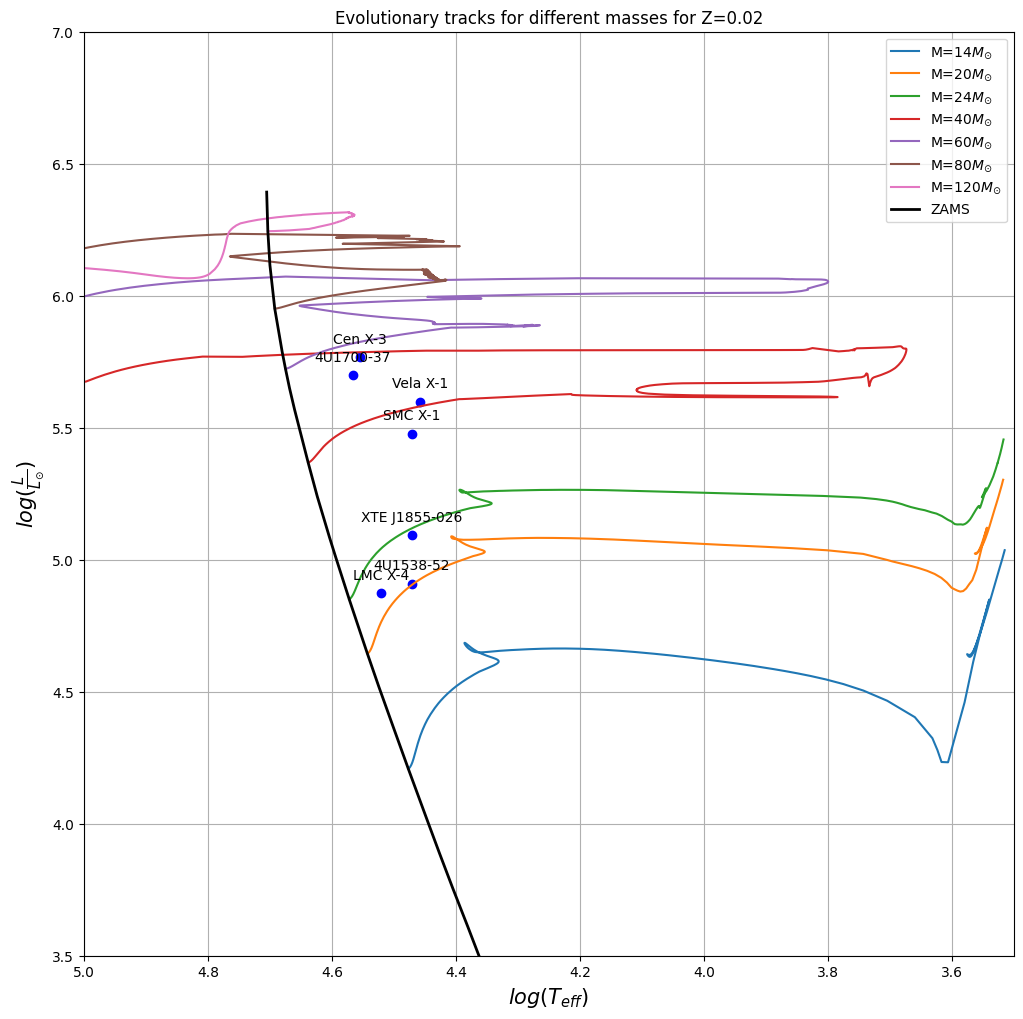

In [7]:
M_values = [14, 20, 24, 40, 60, 80, 120]
M_values = ['{:07.3f}'.format(m) for m in M_values]

plt.figure(figsize=(12,12))
for M in M_values:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'))

for i, label in enumerate(df_MRL["id"].tolist()):
    plt.annotate(label, (df_MRL["logTeff"].tolist()[i], df_MRL["logL_true/L_sun"].tolist()[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2)
plt.scatter(df_MRL['logTeff'], df_MRL['logL_true/L_sun'], color='blue')
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(3.5, 7)
plt.xlim(3.5, 5)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow' size=5> Determine masses

<font color='yellow'> Vela X-1 </font>

In [8]:
# Object
id = 'Vela X-1'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [30, 35, 40, 50]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

KeyError: 'logL_true/L_sun_err'

<font color='yellow'>Cen X-3</font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


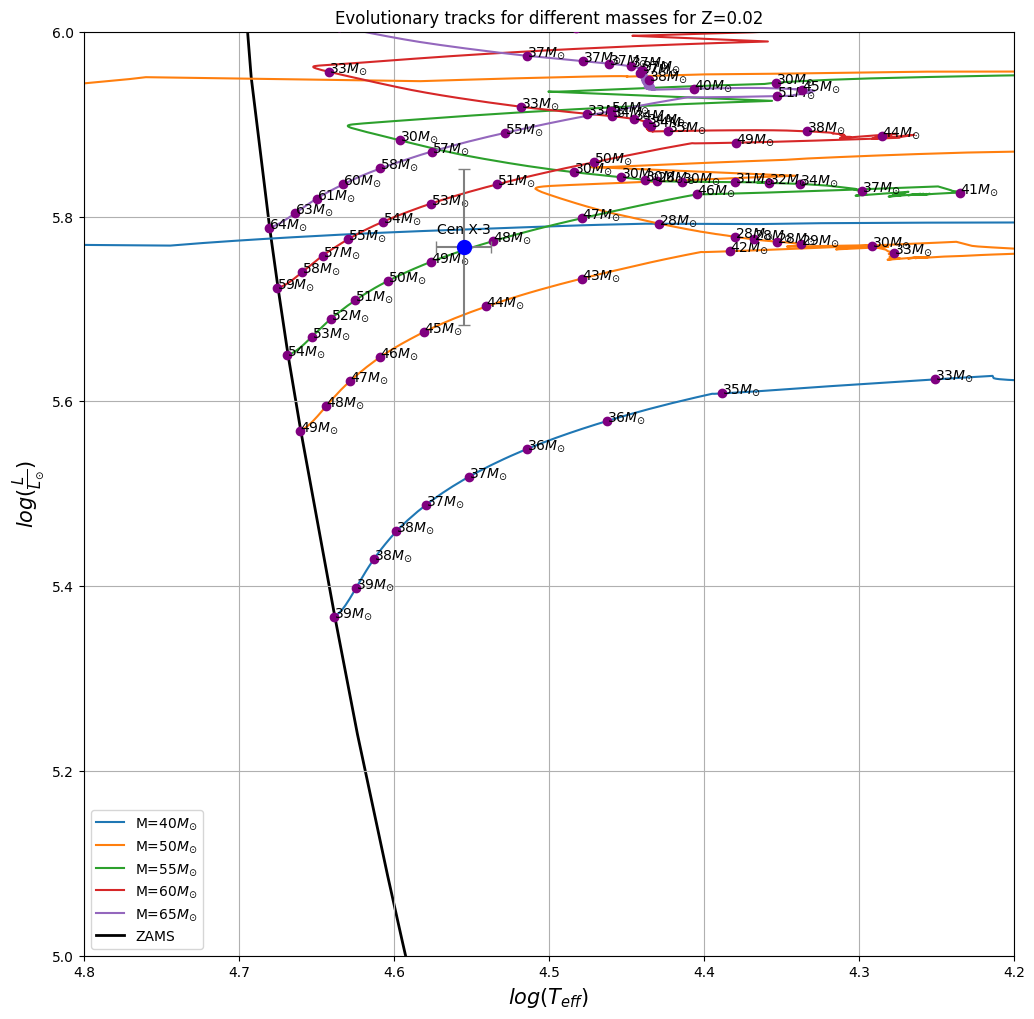

In [ ]:
# Object
id = 'Cen X-3'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [40, 50, 55, 60, 65]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>SMC X-1</font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


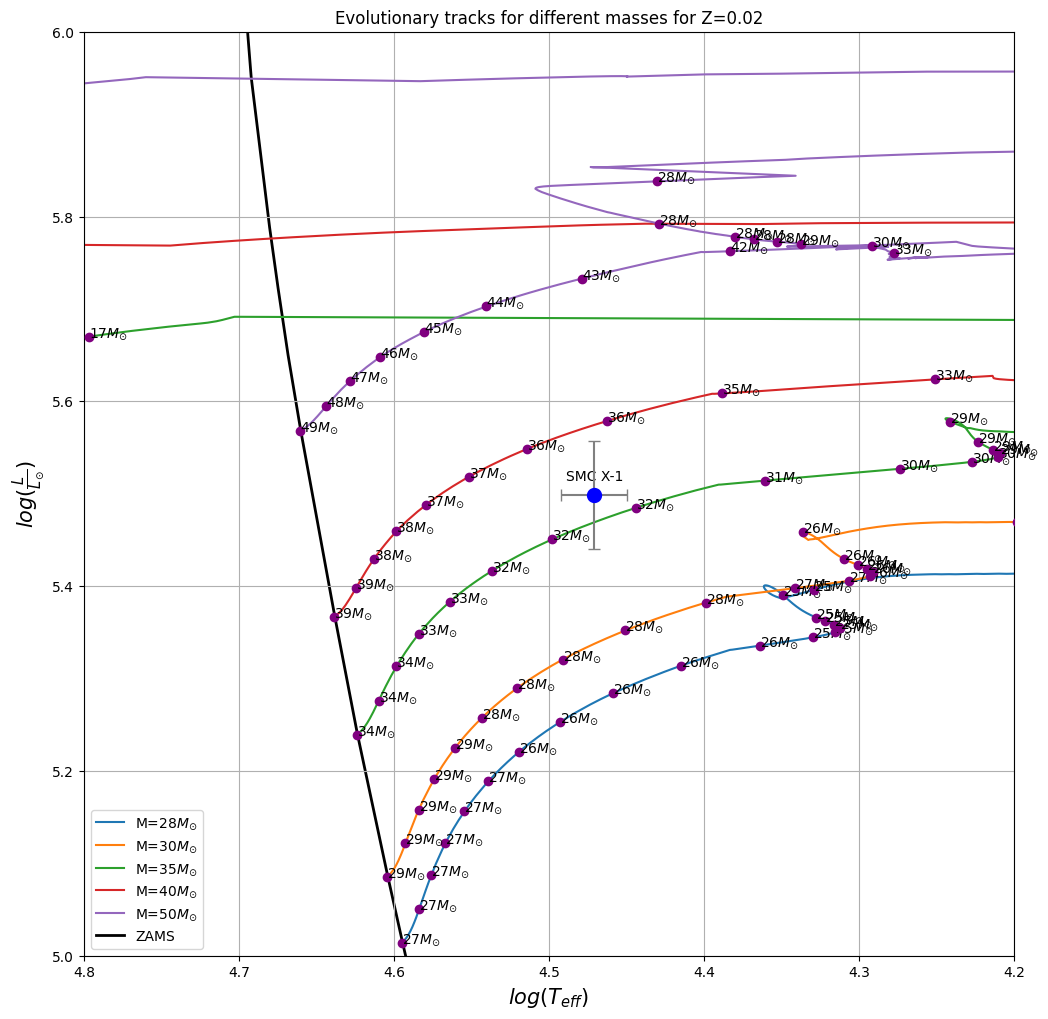

In [ ]:
# Object
id = 'SMC X-1'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [28, 30, 35, 40, 50]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'> LMC X-4 </font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


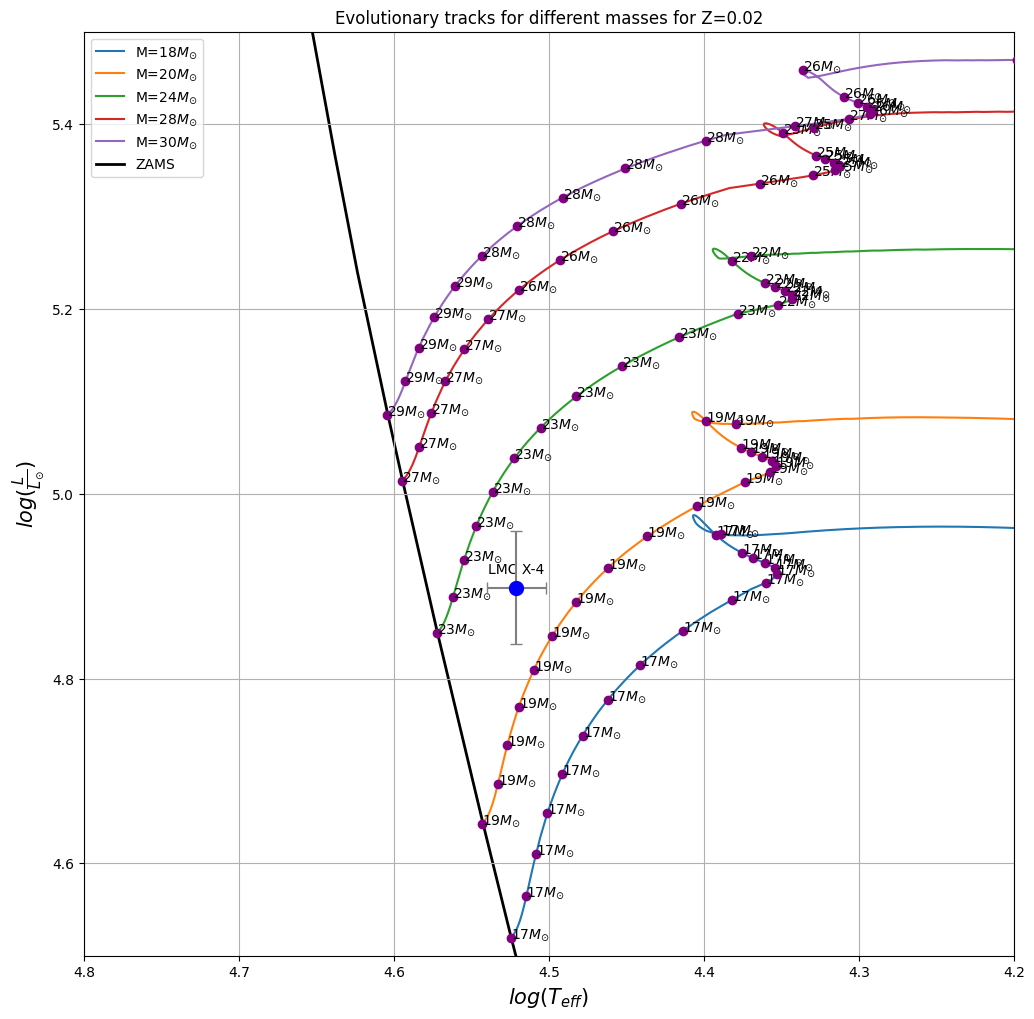

In [ ]:
# Object
id = 'LMC X-4'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>4U1538-52</font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


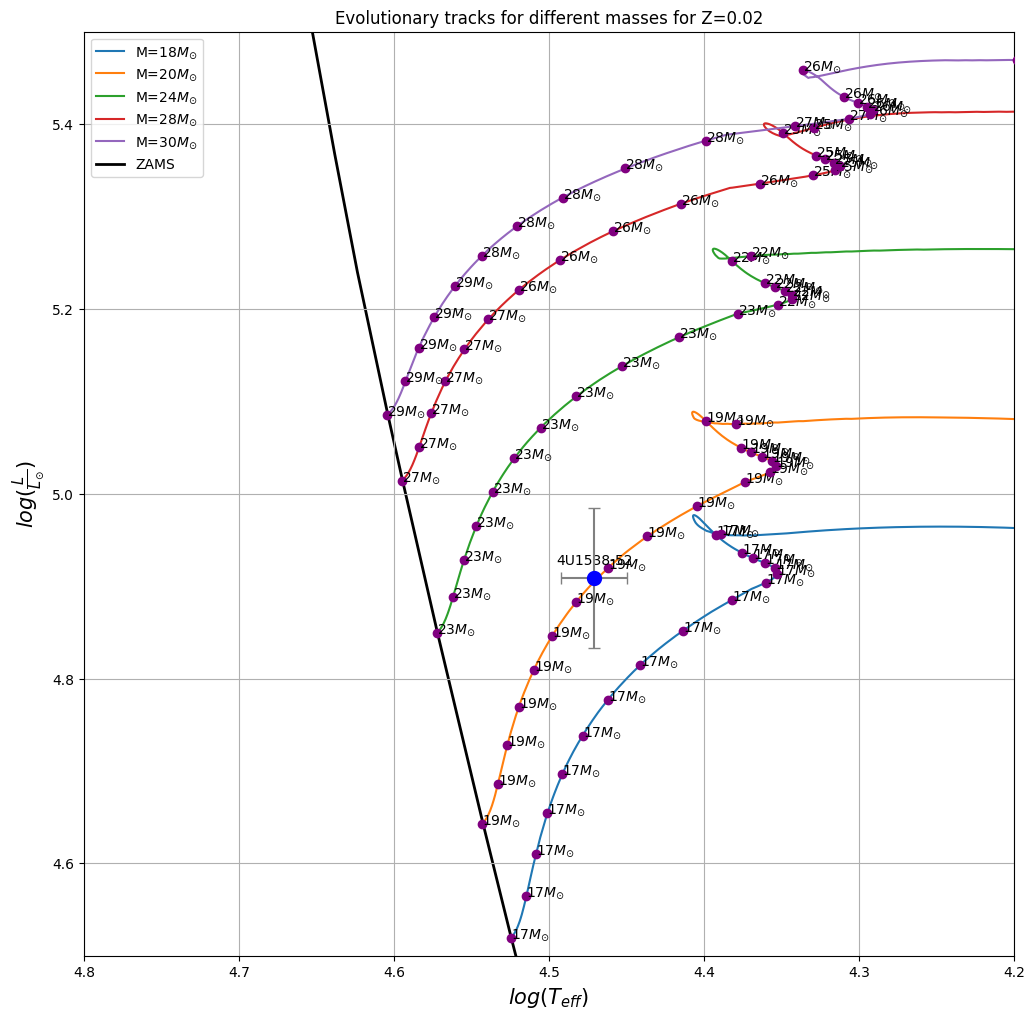

In [ ]:
# Object
id = '4U1538-52'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>4U1700-37</font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


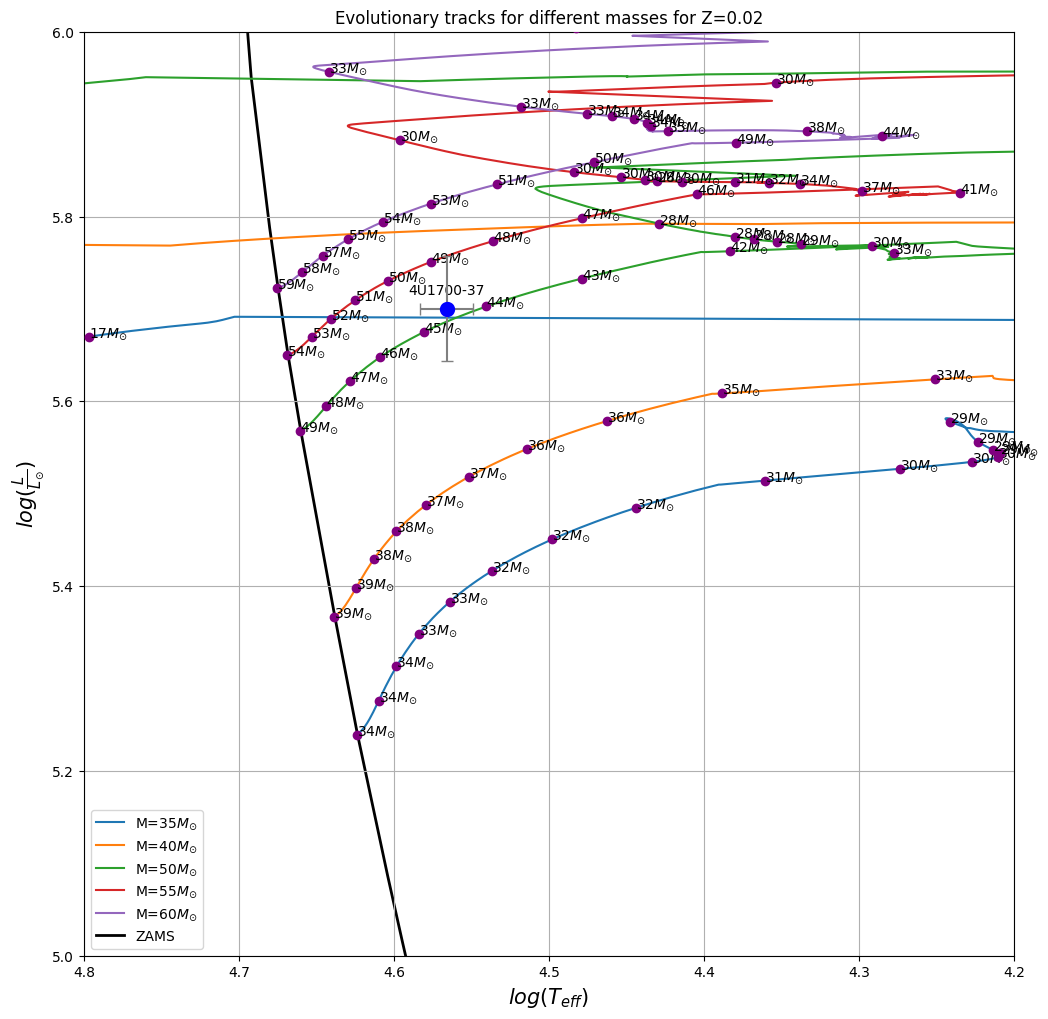

In [ ]:
# Object
id = '4U1700-37'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [35, 40, 50, 55, 60]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(5, 6)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()

<font color='yellow'>XTE J1855-026</font>

Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.
Folder |evolutionary_tracks/extract/Z0.02Y0.284/| already exists.


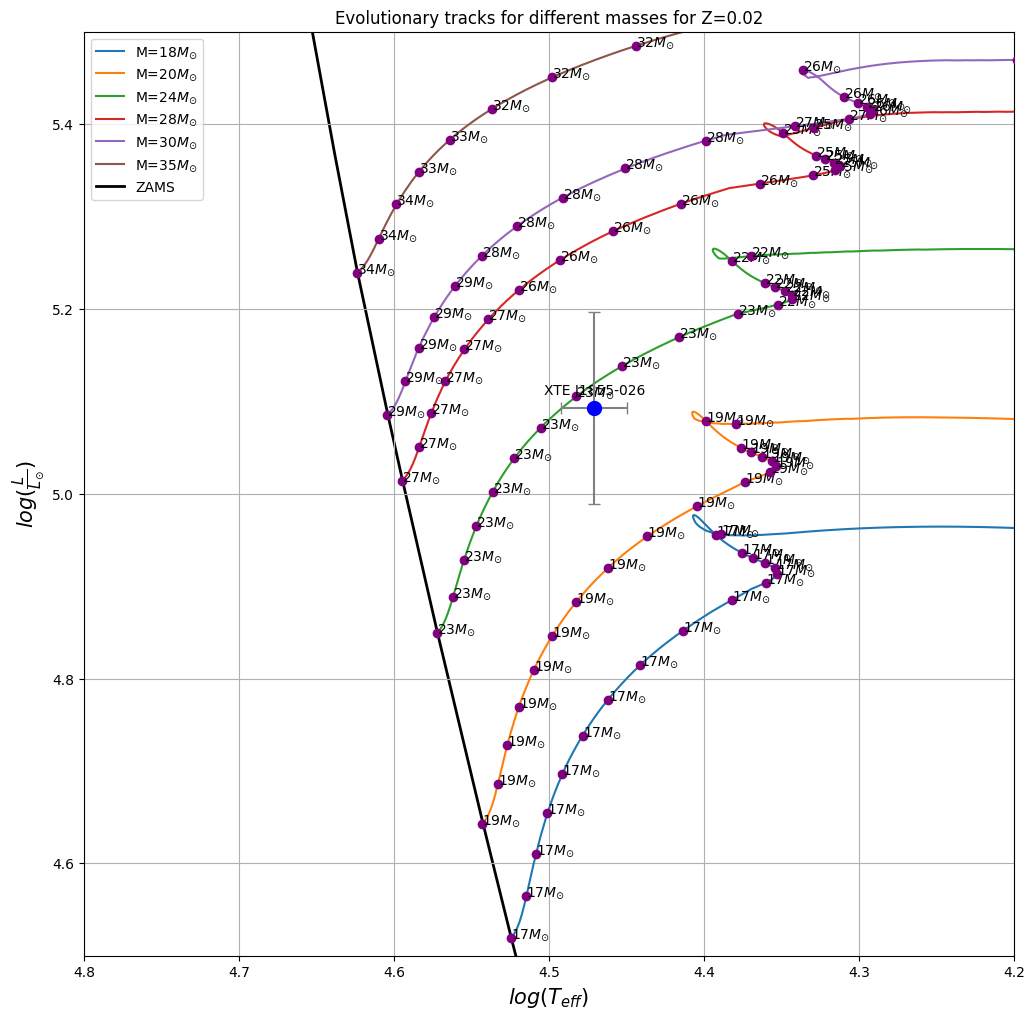

In [ ]:
# Object
id = 'XTE J1855-026'
logTeff_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff'].reset_index(drop=True).at[0]
logTeff_err_obj = df_MRL.loc[df_MRL['id'] == id, 'logTeff_err'].reset_index(drop=True).at[0]
logL_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun'].reset_index(drop=True).at[0]
logL_err_obj = df_MRL.loc[df_MRL['id']== id, 'logL_true/L_sun_err'].reset_index(drop=True).at[0]

# Evolutionary tracks for the following masses
M_values_cen = [16, 18, 20, 24, 28, 30, 35, 40, 50, 55, 60, 65, 70, 80, 90, 95, 100]
M_values_cen = [18, 20, 24, 28, 30, 35]
M_values_cen = ['{:07.3f}'.format(m) for m in M_values_cen]

# Plot evolutionary tracks
plt.figure(figsize=(12,12))
for M in M_values_cen:
    df = evolutionary_track(Z=ZY_values[0][0], Y=ZY_values[0][1], M=M)

    ZAMS_index = find_ZAMS_index(df['H_CEN'].tolist())
    logL = df["LOG_L"].tolist()[ZAMS_index:]
    logT = df["LOG_TE"].tolist()[ZAMS_index:]

    logL = [float(x) for x in logL]
    logT = [float(x) for x in logT]

    plt.plot(logT, logL, label=(f'M={int(float(M))}'+r'$M_{\odot}$'), zorder=2)

    for t in time_intervals(start_point= ZAMS_index, N_iterations=df.shape[0], N_intervals=30):
        M = df['MASS'][t]
        L = df['LOG_L'][t]
        T = df['LOG_TE'][t]
        plt.scatter([T], [L], color='purple', zorder=3)
        plt.annotate(f'{int(M)}' + r'$M_{\odot}$', (T, L))

# Label object
plt.annotate(id, (logTeff_obj, logL_obj), textcoords="offset points", xytext=(0,10), ha='center')

plt.plot(T_ZAMS, L_ZAMS, label='ZAMS', color='black', linewidth=2, zorder=1)
plt.errorbar([logTeff_obj], [logL_obj], yerr=[logL_err_obj], xerr=[logTeff_err_obj], color='blue', ecolor='gray', capsize=4, zorder=4)
plt.scatter([logTeff_obj], [logL_obj], linewidths=5, color='blue', zorder=5)
plt.title(f'Evolutionary tracks for different masses for Z={ZY_values[0][0]}')
plt.xlabel(r"$log(T_{eff})$", fontsize=15)
plt.ylabel(r"$log(\frac{L}{L_{\odot}})$", fontsize=15)
plt.ylim(4.5, 5.5)
plt.xlim(4.2, 4.8)
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()